# load library and data

In [45]:
import pandas as pd
import os
import yfinance as yf
import matplotlib.pyplot  as plt
import seaborn as sns




In [2]:
os.listdir()

['esg_data_for_project.csv',
 'esg_data_for_project_ticker.csv',
 'ESG_SCORE_FINANCE.ipynb',
 'first_8000_checked.csv',
 'full_checked.csv',
 'Project Topic.docx']

In [ ]:
score_df = pd.read_csv('esg_data_for_project_ticker.csv')

In [4]:
score_df.head()

Unnamed: 0  risk_rating_score risk_rating_assessment  \
0           0               28.9            Medium Risk   
1           1               27.7            Medium Risk   
2           2               22.5            Medium Risk   
3           3               16.3               Low Risk   
4           4               35.0              High Risk   

               industry_group identifier                   country  \
0                   Retailing   NAS:FLWS  United States of America   
1  Telecommunication Services    ETR:1U1                   Germany   
2             Pharmaceuticals    NAS:TXG  United States of America   
3         Software & Services    WAR:11B                    Poland   
4                       Banks   NAS:SRCE  United States of America   

            company_name  ticker  
0  1-800-flowers-com-inc    FLWS  
1                 1-1-ag  1U1.DE  
2       10x-genomics-inc     TXG  
3      11-bit-studios-sa  11B.WA  
4        1st-source-corp    SRCE

# yfinance

In [5]:
data_df=yf.download("MSFT", start="2024-01-02", end="2024-12-30", interval="1d")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
data_df

Price            Close        High         Low        Open    Volume
Ticker            MSFT        MSFT        MSFT        MSFT      MSFT
Date                                                                
2024-01-02  367.380585  372.363258  363.319154  370.342443  25258600
2024-01-03  367.113159  369.748136  365.042827  365.538123  23083500
2024-01-04  364.478149  369.589604  363.715405  367.182474  20901500
2024-01-05  364.289978  368.559424  363.051739  365.498501  20987000
2024-01-08  371.164673  371.669884  365.538121  365.825371  23134000
...                ...         ...         ...         ...       ...
2024-12-20  435.726318  442.852015  427.772266  432.243282  64263700
2024-12-23  434.379028  436.774220  431.963858  435.866037  19152500
2024-12-24  438.450836  438.720315  433.321138  433.780209   7164500
2024-12-26  437.233276  440.057630  435.756258  438.201337   8194200
2024-12-27  429.668457  434.349074  425.496829  433.730320  18117700

[250 rows x 5 columns]

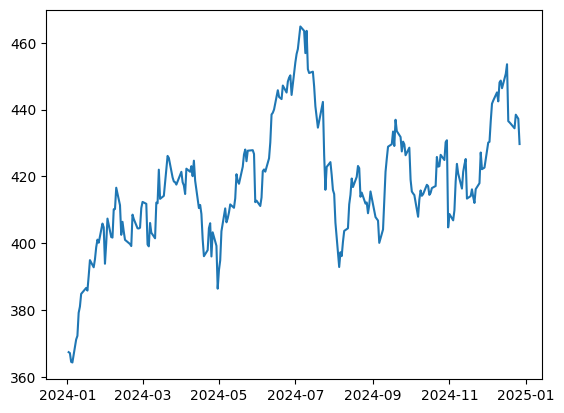

In [7]:
import matplotlib.pyplot as plt 
plt.plot(data_df['Close'])
plt.show()      

In [8]:
annual_return = (data_df["Close"].iloc[-1] - data_df["Close"].iloc[0]) / data_df["Close"].iloc[0]


In [16]:
annual_return


Ticker
MSFT    0.169546
dtype: float64

In [14]:
list(data_df["Close"])[-1]

'MSFT'

In [19]:
annual_return = (data_df["Close"]['FLWS'][-1] - data_df["Close"]['FLWS'][0])/(data_df["Close"]['FLWS'][0])

KeyError: 'FLWS'

In [ ]:
annual_return

0.5842871653335325

# loop

## df preparation

In [20]:
score_df1=score_df


In [21]:
score_df1.head()

Unnamed: 0  risk_rating_score risk_rating_assessment  \
0           0               28.9            Medium Risk   
1           1               27.7            Medium Risk   
2           2               22.5            Medium Risk   
3           3               16.3               Low Risk   
4           4               35.0              High Risk   

               industry_group identifier                   country  \
0                   Retailing   NAS:FLWS  United States of America   
1  Telecommunication Services    ETR:1U1                   Germany   
2             Pharmaceuticals    NAS:TXG  United States of America   
3         Software & Services    WAR:11B                    Poland   
4                       Banks   NAS:SRCE  United States of America   

            company_name  ticker  
0  1-800-flowers-com-inc    FLWS  
1                 1-1-ag  1U1.DE  
2       10x-genomics-inc     TXG  
3      11-bit-studios-sa  11B.WA  
4        1st-source-corp    SRCE

In [22]:
score_df1['anual_return'] = None

In [23]:
score_df1.head()

Unnamed: 0  risk_rating_score risk_rating_assessment  \
0           0               28.9            Medium Risk   
1           1               27.7            Medium Risk   
2           2               22.5            Medium Risk   
3           3               16.3               Low Risk   
4           4               35.0              High Risk   

               industry_group identifier                   country  \
0                   Retailing   NAS:FLWS  United States of America   
1  Telecommunication Services    ETR:1U1                   Germany   
2             Pharmaceuticals    NAS:TXG  United States of America   
3         Software & Services    WAR:11B                    Poland   
4                       Banks   NAS:SRCE  United States of America   

            company_name  ticker anual_return  
0  1-800-flowers-com-inc    FLWS         None  
1                 1-1-ag  1U1.DE         None  
2       10x-genomics-inc     TXG         None  
3      11-bit-studios-sa  11B.WA         None  
4        1st-source-corp    SRCE         None

In [25]:
score_df1['Downloadable'] = False
score_df1.shape

(14003, 10)

## download and return calculation

In [ ]:
"""
for index, row in score_df1.iloc[8000:].iterrows():
    try:
        tick = row['ticker']
        tick_data_df = yf.download(tick, start="2024-01-02", end="2024-12-30", interval="1d")
        annual_return = (tick_data_df["Close"][tick][-1] - tick_data_df["Close"][tick][0])/(tick_data_df["Close"][tick][0])
        score_df1.at[index, 'anual_return'] = annual_return
        score_df1.at[index, 'Downloadable'] = True
    except Exception as e:
        pass
"""

[*********************100%***********************]  1 of 1 completed
C:\Users\Soumi\AppData\Local\Temp\ipykernel_14272\844265220.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annual_return = (tick_data_df["Close"][tick][-1] - tick_data_df["Close"][tick][0])/(tick_data_df["Close"][tick][0])
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CAI:MFPC']: YFTzMissingError('possibly delisted; no timezone found')
C:\Users\Soumi\AppData\Local\Temp\ipykernel_14272\844265220.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annual_return = (tick_data_df["Close"][tick][-1] - tick

In [108]:
score_df1.head(30)

Unnamed: 0  risk_rating_score risk_rating_assessment  \
0            0               28.9            Medium Risk   
1            1               27.7            Medium Risk   
2            2               22.5            Medium Risk   
3            3               16.3               Low Risk   
4            4               35.0              High Risk   
5            5               24.4            Medium Risk   
6            6               21.4            Medium Risk   
7            7               38.5              High Risk   
8            8               23.1            Medium Risk   
9            9               35.9              High Risk   
10          10               25.3            Medium Risk   
11          11               24.7            Medium Risk   
12          12               22.1            Medium Risk   
13          13               18.1               Low Risk   
14          14               16.4               Low Risk   
15          15               29.2            Medium Risk   
16          16               32.4              High Risk   
17          17               24.3            Medium Risk   
18          18               10.4               Low Risk   
19          19               43.0            Severe Risk   
20          20               22.9            Medium Risk   
21          21               34.7              High Risk   
22          22               24.0            Medium Risk   
23          23               44.0            Severe Risk   
24          24               10.8               Low Risk   
25          25               35.1              High Risk   
26          26               16.5               Low Risk   
27          27               42.0            Severe Risk   
28          28               14.9               Low Risk   
29          29               33.8              High Risk   

                   industry_group  identifier                   country  \
0                       Retailing    NAS:FLWS  United States of America   
1      Telecommunication Services     ETR:1U1                   Germany   
2                 Pharmaceuticals     NAS:TXG  United States of America   
3             Software & Services     WAR:11B                    Poland   
4                           Banks    NAS:SRCE  United States of America   
5                  Transportation    OSL:2020                   Bermuda   
6                 Pharmaceuticals   OTC:MEHCQ  United States of America   
7              Diversified Metals     ASX:29M                 Australia   
8                       Utilities           -                     Italy   
9                 Pharmaceuticals    NAS:TSVT  United States of America   
10            Software & Services           -  United States of America   
11         Diversified Financials  BOM:542772                     India   
12            Software & Services  SHG:601360                     China   
13             Textiles & Apparel    HKG:1361                     China   
14            Software & Services  SHE:002555                     China   
15            Commercial Services    NAS:SCWO  United States of America   
16                Pharmaceuticals    HKG:1244                     China   
17            Technology Hardware     NYS:DDD  United States of America   
18         Diversified Financials     LON:III            United Kingdom   
19       Industrial Conglomerates     NYS:MMM  United States of America   
20       Industrial Conglomerates  BOM:523395                     India   
21                 Semiconductors  SHG:688536                     China   
22                Pharmaceuticals    HKG:1530                     China   
23     Construction & Engineering           -                    Canada   
24  Transportation Infrastructure           -                    Canada   
25                Pharmaceuticals    NAS:FDMT  United States of America   
26                          Media    LON:FOUR            United Kingdom   
27                      Chemicals    NAS:FE

In [74]:
df1 = score_df1[score_df1['Downloadable']==True]

In [75]:
df1.shape

(10172, 10)

In [51]:
country_counts = df1['country'].value_counts()
sorted_countries = country_counts.index.tolist()


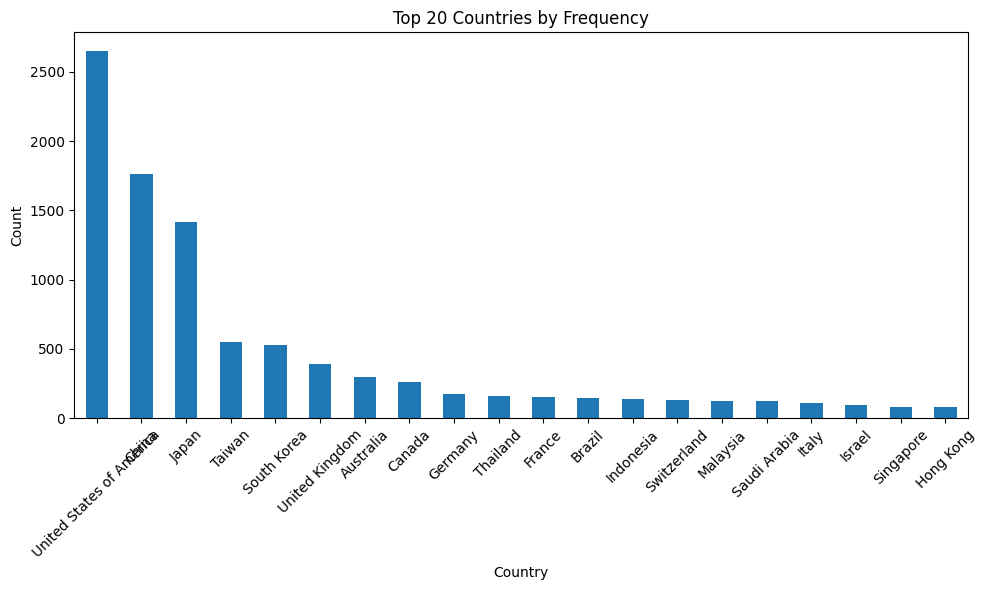

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count occurrences
 # country_counts = df1['country'].value_counts()

# Plot top 10 countries (you can change the number)
 #top_n = 20
#country_counts.head(top_n).plot(kind='bar', figsize=(10, 6))

#plt.title(f"Top {top_n} Countries by Frequency")
#plt.xlabel("Country")
#plt.ylabel("Count")
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()


In [125]:
d_list = list(score_df1['Downloadable'])

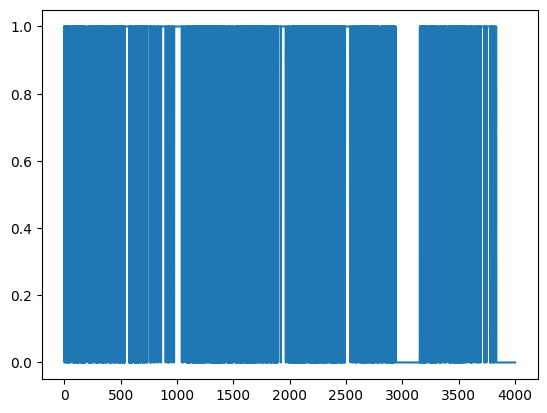

In [128]:
plt.plot(d_list[10000:])
plt.show()

In [27]:
score_df1 = pd.read_csv('full_checked.csv')

In [61]:
df_IN = score_df1[score_df1['country']=="India"]
df_IN

Unnamed: 0  risk_rating_score risk_rating_assessment  \
11             11               24.7            Medium Risk   
20             20               22.9            Medium Risk   
46             46               28.6            Medium Risk   
55             55               32.8              High Risk   
56             56               28.3            Medium Risk   
...           ...                ...                    ...   
13855       13855               13.1               Low Risk   
13858       13858               21.5            Medium Risk   
13863       13863               17.0               Low Risk   
13871       13871               22.9            Medium Risk   
13993       13993               16.9               Low Risk   

                 industry_group  identifier country  \
11       Diversified Financials  BOM:542772   India   
20     Industrial Conglomerates  BOM:523395   India   
46       Diversified Financials  BOM:544176   India   
55              Pharmaceuticals  BOM:524348   India   
56                    Chemicals  BOM:524208   India   
...                         ...         ...     ...   
13855                     Media  BOM:505537   India   
13858       Software & Services  BOM:533339   India   
13863       Software & Services  BOM:504067   India   
13871           Auto Components  BOM:533023   India   
13993       Software & Services  BOM:543320   India   

                                          company_name     ticker  \
11                                     360-one-wam-ltd  542772.BO   
20                                        3m-india-ltd  523395.BO   
46                          aadhar-housing-finance-ltd  544176.BO   
55                                     aarti-drugs-ltd  524348.BO   
56                                aarti-industries-ltd  524208.BO   
...                                                ...        ...   
13855                zee-entertainment-enterprises-ltd  505537.BO   
13858                             zen-technologies-ltd  533339.BO   
13863                          zensar-technologies-ltd  504067.BO   
13871  zf-commercial-vehicle-control-systems-india-ltd  533023.BO   
13993                                       zomato-ltd  543320.BO   

       anual_return  Downloadable  
11              NaN         False  
20              NaN         False  
46              NaN         False  
55              NaN         False  
56              NaN         False  
...             ...           ...  
13855           NaN         False  
13858           NaN         False  
13863           NaN         False  
13871           NaN         False  
13993           NaN         False  

[697 rows x 10 columns]

In [ ]:
for index, row in df_IN.iterrows():
    try:
        tick_IN = row['ticker']
        tick_IN_df = yf.download(tick_IN, start="2024-01-02", end="2024-12-30", interval="1d")
        annual_return = (tick_IN_df["Close"][tick_IN][-1] - tick_IN_df["Close"][tick_IN][0])/(tick_IN_df["Close"][tick_IN][0])
        df_IN.at[index, 'anual_return'] = annual_return
        df_IN.at[index, 'Downloadable'] = True
    except Exception as e:
        pass

In [66]:
from nsepy import get_history
from datetime import date

for index, row in df_IN.iterrows():
    try:
        symbol = row['nse_symbol']  # e.g., RELIANCE

        data = get_history(symbol=symbol,
                           start=date(2024,1,2),
                           end=date(2024,12,30))
        
        start_price = data['Close'].iloc[0]
        end_price = data['Close'].iloc[-1]

        annual_return = (end_price - start_price) / start_price

        df_IN.at[index, 'anual_return'] = annual_return
        df_IN.at[index, 'Downloadable'] = True
    except Exception:
        df_IN.at[index, 'Downloadable'] = False


In [67]:
df_IN

Unnamed: 0  risk_rating_score risk_rating_assessment  \
11             11               24.7            Medium Risk   
20             20               22.9            Medium Risk   
46             46               28.6            Medium Risk   
55             55               32.8              High Risk   
56             56               28.3            Medium Risk   
...           ...                ...                    ...   
13855       13855               13.1               Low Risk   
13858       13858               21.5            Medium Risk   
13863       13863               17.0               Low Risk   
13871       13871               22.9            Medium Risk   
13993       13993               16.9               Low Risk   

                 industry_group  identifier country  \
11       Diversified Financials  BOM:542772   India   
20     Industrial Conglomerates  BOM:523395   India   
46       Diversified Financials  BOM:544176   India   
55              Pharmaceuticals  BOM:524348   India   
56                    Chemicals  BOM:524208   India   
...                         ...         ...     ...   
13855                     Media  BOM:505537   India   
13858       Software & Services  BOM:533339   India   
13863       Software & Services  BOM:504067   India   
13871           Auto Components  BOM:533023   India   
13993       Software & Services  BOM:543320   India   

                                          company_name     ticker  \
11                                     360-one-wam-ltd  542772.BO   
20                                        3m-india-ltd  523395.BO   
46                          aadhar-housing-finance-ltd  544176.BO   
55                                     aarti-drugs-ltd  524348.BO   
56                                aarti-industries-ltd  524208.BO   
...                                                ...        ...   
13855                zee-entertainment-enterprises-ltd  505537.BO   
13858                             zen-technologies-ltd  533339.BO   
13863                          zensar-technologies-ltd  504067.BO   
13871  zf-commercial-vehicle-control-systems-india-ltd  533023.BO   
13993                                       zomato-ltd  543320.BO   

       anual_return  Downloadable  
11              NaN         False  
20              NaN         False  
46              NaN         False  
55              NaN         False  
56              NaN         False  
...             ...           ...  
13855           NaN         False  
13858           NaN         False  
13863           NaN         False  
13871           NaN         False  
13993           NaN         False  

[697 rows x 10 columns]

In [73]:
from nsepy import get_history
from datetime import date
data = get_history(symbol="542772", start=date(2024,1,1), end=date(2024,12,31))
print(data)


Empty DataFrame
Columns: [Symbol, Series, Prev Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover, Trades, Deliverable Volume, %Deliverble]
Index: []


In [80]:
os.listdir()

['esg_data_for_project.csv',
 'esg_data_for_project_ticker.csv',
 'esg_return_volatility.csv',
 'ESG_SCORE_FINANCE.ipynb',
 'first_8000_checked.csv',
 'full_checked.csv',
 'Project Topic.docx']

# analysis

# start

## non segmenetd analysis

In [3]:
vol_df = pd.read_csv('esg_return_volatility.csv')

In [4]:
vol_df1 = vol_df.dropna()

In [5]:
vol_df1

risk_rating_score risk_rating_assessment              industry_group  \
0                   28.9            Medium Risk                   Retailing   
1                   27.7            Medium Risk  Telecommunication Services   
2                   22.5            Medium Risk             Pharmaceuticals   
3                   16.3               Low Risk         Software & Services   
4                   35.0              High Risk                       Banks   
...                  ...                    ...                         ...   
13998               32.0              High Risk                  Healthcare   
13999               21.6            Medium Risk         Technology Hardware   
14000               33.5              High Risk                   Machinery   
14001               35.0              High Risk             Pharmaceuticals   
14002               36.4              High Risk               Food Products   

       identifier                   country           company_name     ticker  \
0        NAS:FLWS  United States of America  1-800-flowers-com-inc       FLWS   
1         ETR:1U1                   Germany                 1-1-ag     1U1.DE   
2         NAS:TXG  United States of America       10x-genomics-inc        TXG   
3         WAR:11B                    Poland      11-bit-studios-sa     11B.WA   
4        NAS:SRCE  United States of America        1st-source-corp       SRCE   
...           ...                       ...                    ...        ...   
13998    NAS:ZYXI  United States of America              zynex-inc       ZYXI   
13999    TAI:3704                    Taiwan       zyxel-group-corp    3704.TW   
14000     SWX:BYS               Switzerland           bystronic-ag     BYS.SW   
14001  KRX:214370               South Korea         caregen-co-ltd  214370.KS   
14002     NYS:FLO  United States of America      flowers-foods-inc        FLO   

       return  volatility  
0     -0.2236      0.4191  
1     -0.3420      0.2791  
2     -0.7357      0.6540  
3     -0.6866      0.6431  
4      0.1023      0.3087  
...       ...         ...  
13998 -0.2709      0.4545  
13999 -0.2012      0.3786  
14000 -0.3144      0.3133  
14001  0.0597      0.6356  
14002 -0.0680      0.1803  

[10463 rows x 9 columns]

### univariate 

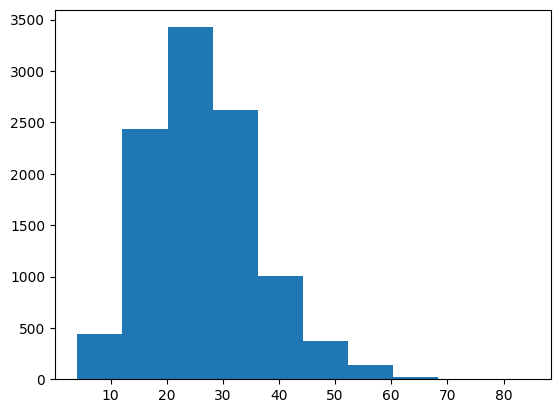

In [13]:
#histogram , boxplot
plt.hist(vol_df1["risk_rating_score"],bins=10)
plt.show()

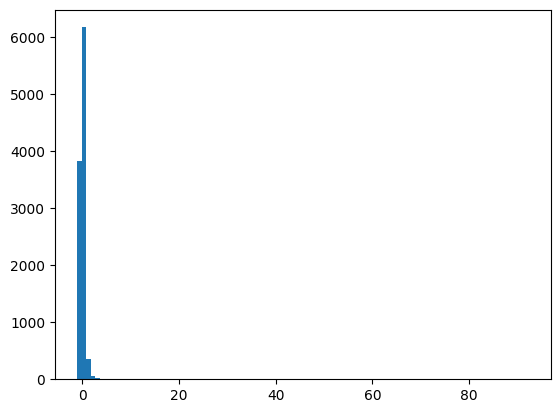

In [18]:
plt.hist(vol_df1["return"],bins=100)
plt.show()

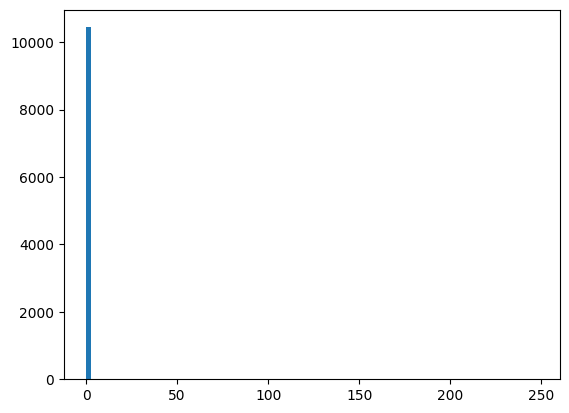

In [19]:
plt.hist(vol_df1["volatility"],bins=100)
plt.show()

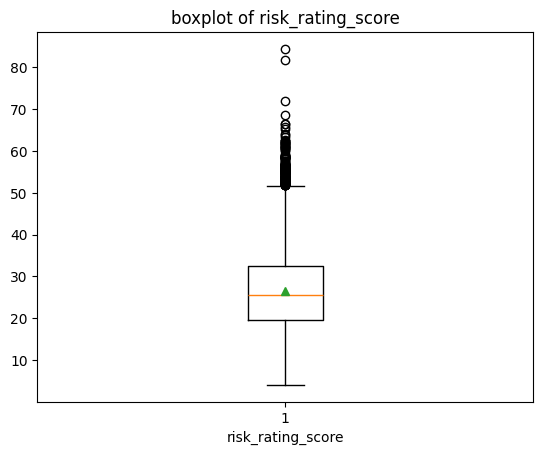

In [34]:
plt.boxplot(vol_df1["risk_rating_score"], showfliers = True, showmeans = True)
plt.xlabel("risk_rating_score")
plt.title("boxplot of risk_rating_score")
plt.show()

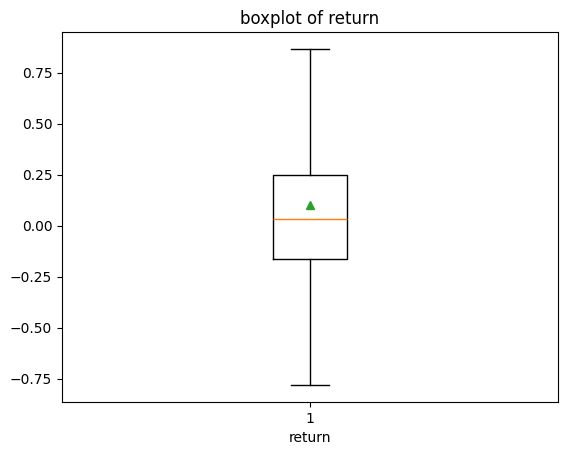

In [25]:
plt.boxplot(vol_df1["return"], showfliers = False, showmeans = True)
plt.xlabel("return")
plt.title("boxplot of return")
plt.show()

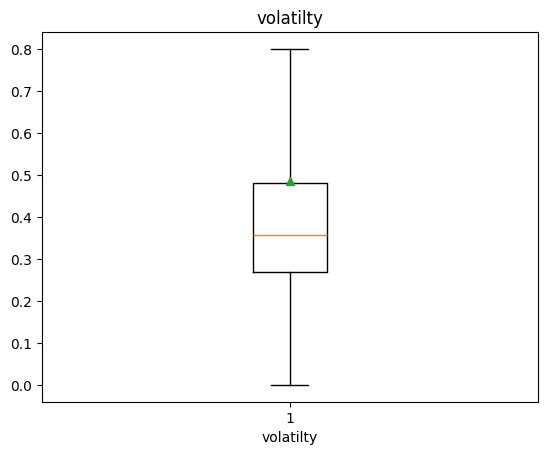

In [39]:
plt.boxplot(vol_df1["volatility"],showfliers=False, showmeans=True)
plt.xlabel("volatilty")
plt.title("volatilty")
plt.show()

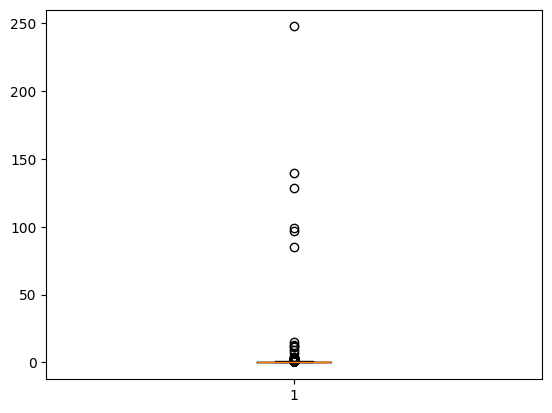

In [27]:
plt.boxplot(vol_df1["volatility"],showfliers=True)
plt.show()

In [74]:
Filtered_df = vol_df1[(vol_df1["return"]<2) & (vol_df1["volatility"]<2) & (vol_df1["risk_rating_score"]<80)]

In [59]:
Filtered_df.head()
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Soumi\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

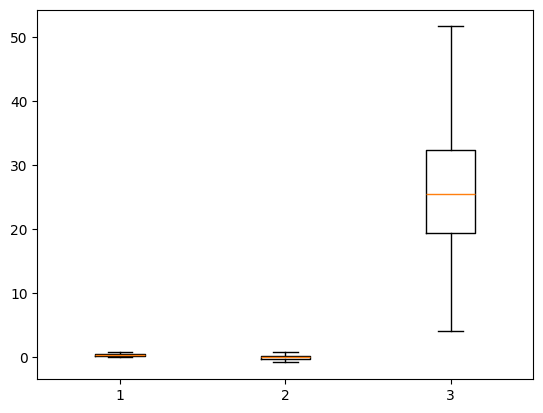

In [53]:
plt.boxplot(Filtered_df[["volatility","return","risk_rating_score"]], showfliers=False)
plt.show()

### multivariate

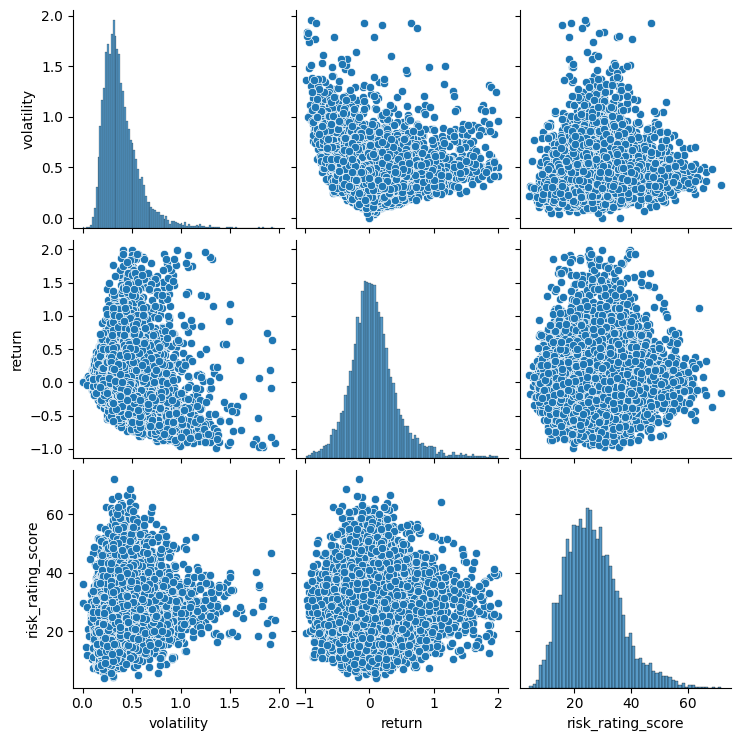

In [75]:
sns.pairplot(Filtered_df[["volatility","return","risk_rating_score"]])
plt.show()

In [61]:
Filtered_df.shape


(10356, 9)

In [7]:
#pairplot

<Axes: >

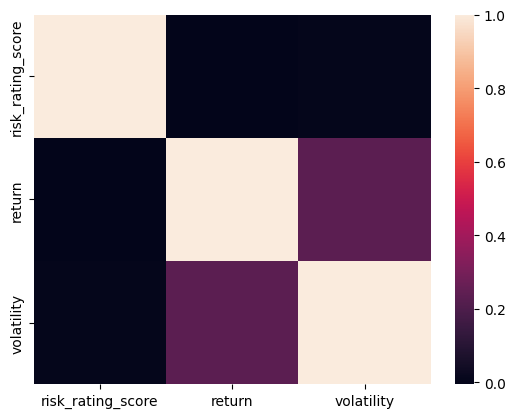

In [63]:
import seaborn as sns
sns.heatmap(vol_df1[['risk_rating_score', 'return', 'volatility']].corr())

In [76]:
import statsmodels.api as sm
import numpy as np

# Sample data
X = Filtered_df["risk_rating_score"]        # Independent variable
y = Filtered_df["return"]        # Dependent variable

# Add a constant (for intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1938
Date:                Fri, 02 May 2025   Prob (F-statistic):              0.660
Time:                        21:51:19   Log-Likelihood:                -4697.1
No. Observations:               10356   AIC:                             9398.
Df Residuals:                   10354   BIC:                             9413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0626      0.01

In [77]:

# Sample data
X = Filtered_df["risk_rating_score"]        # Independent variable
y = Filtered_df["volatility"]        # Dependent variable

# Add a constant (for intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             volatility   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     292.2
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.28e-64
Time:                        21:51:31   Log-Likelihood:                 2301.7
No. Observations:               10356   AIC:                            -4599.
Df Residuals:                   10354   BIC:                            -4585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3079      0.00

In [81]:
l_country=list(Filtered_df["country"].unique())

In [82]:
len(l_country)

61

In [83]:
print(l_country)

['United States of America', 'Germany', 'Poland', 'Bermuda', 'Australia', 'China', 'United Kingdom', 'France', 'Taiwan', 'Denmark', 'Italy', 'Netherlands', 'Qatar', 'Switzerland', 'Japan', 'South Korea', 'Saudi Arabia', 'Spain', 'Belgium', 'India', 'Canada', 'Finland', 'Greece', 'Thailand', 'Singapore', 'Malaysia', 'Norway', 'Israel', 'Kuwait', 'Austria', 'Hong Kong', 'New Zealand', 'Aland Islands', 'Mexico', 'Peru', 'Luxembourg', 'Brazil', 'Portugal', 'Cyprus', 'Faroe Islands', 'Lithuania', 'Cayman Islands', 'Sweden', 'Papua New Guinea', 'Indonesia', 'Ireland', 'Czech Republic', 'Iceland', 'Pakistan', 'Gibraltar', 'Bahrain', 'Ukraine', 'Estonia', 'Liechtenstein', 'Macao', 'Monaco', 'Cambodia', 'Argentina', 'South Africa', 'Barbados', 'Nigeria']


In [84]:
developed_countries = [
    'United States of America', 'Germany', 'Australia', 'United Kingdom', 'France',
    'Denmark', 'Italy', 'Netherlands', 'Switzerland', 'Japan', 'South Korea',
    'Spain', 'Belgium', 'Canada', 'Finland', 'Greece', 'Singapore', 'Norway',
    'Israel', 'Austria', 'New Zealand', 'Sweden', 'Ireland', 'Czech Republic',
    'Iceland', 'Luxembourg', 'Portugal'
]


In [86]:
len(developed_countries)

27

In [85]:
developing_countries = [
    'Poland', 'Bermuda', 'China', 'Taiwan', 'Qatar', 'Saudi Arabia', 'India',
    'Thailand', 'Malaysia', 'Kuwait', 'Hong Kong', 'Aland Islands', 'Mexico',
    'Peru', 'Brazil', 'Cyprus', 'Faroe Islands', 'Lithuania', 'Cayman Islands',
    'Papua New Guinea', 'Indonesia', 'Pakistan', 'Gibraltar', 'Bahrain',
    'Ukraine', 'Estonia', 'Liechtenstein', 'Macao', 'Monaco', 'Cambodia',
    'Argentina', 'South Africa', 'Barbados', 'Nigeria'
]


In [87]:
len(developing_countries)

34

In [90]:
Filtered_df['developed'] = Filtered_df['country'].isin(developed_countries)

C:\Users\Soumi\AppData\Local\Temp\ipykernel_7808\3941081939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_df['developed'] = Filtered_df['country'].isin(developed_countries)


In [91]:
Filtered_df

risk_rating_score risk_rating_assessment              industry_group  \
0                   28.9            Medium Risk                   Retailing   
1                   27.7            Medium Risk  Telecommunication Services   
2                   22.5            Medium Risk             Pharmaceuticals   
3                   16.3               Low Risk         Software & Services   
4                   35.0              High Risk                       Banks   
...                  ...                    ...                         ...   
13998               32.0              High Risk                  Healthcare   
13999               21.6            Medium Risk         Technology Hardware   
14000               33.5              High Risk                   Machinery   
14001               35.0              High Risk             Pharmaceuticals   
14002               36.4              High Risk               Food Products   

       identifier                   country           company_name     ticker  \
0        NAS:FLWS  United States of America  1-800-flowers-com-inc       FLWS   
1         ETR:1U1                   Germany                 1-1-ag     1U1.DE   
2         NAS:TXG  United States of America       10x-genomics-inc        TXG   
3         WAR:11B                    Poland      11-bit-studios-sa     11B.WA   
4        NAS:SRCE  United States of America        1st-source-corp       SRCE   
...           ...                       ...                    ...        ...   
13998    NAS:ZYXI  United States of America              zynex-inc       ZYXI   
13999    TAI:3704                    Taiwan       zyxel-group-corp    3704.TW   
14000     SWX:BYS               Switzerland           bystronic-ag     BYS.SW   
14001  KRX:214370               South Korea         caregen-co-ltd  214370.KS   
14002     NYS:FLO  United States of America      flowers-foods-inc        FLO   

       return  volatility  developed  
0     -0.2236      0.4191       True  
1     -0.3420      0.2791       True  
2     -0.7357      0.6540       True  
3     -0.6866      0.6431      False  
4      0.1023      0.3087       True  
...       ...         ...        ...  
13998 -0.2709      0.4545       True  
13999 -0.2012      0.3786      False  
14000 -0.3144      0.3133       True  
14001  0.0597      0.6356       True  
14002 -0.0680      0.1803       True  

[10356 rows x 10 columns]

In [98]:
developed_df = Filtered_df[(Filtered_df["developed"]==True)]

In [99]:
developed_df

risk_rating_score risk_rating_assessment              industry_group  \
0                   28.9            Medium Risk                   Retailing   
1                   27.7            Medium Risk  Telecommunication Services   
2                   22.5            Medium Risk             Pharmaceuticals   
4                   35.0              High Risk                       Banks   
6                   21.4            Medium Risk             Pharmaceuticals   
...                  ...                    ...                         ...   
13997               29.0            Medium Risk             Pharmaceuticals   
13998               32.0              High Risk                  Healthcare   
14000               33.5              High Risk                   Machinery   
14001               35.0              High Risk             Pharmaceuticals   
14002               36.4              High Risk               Food Products   

       identifier                   country           company_name     ticker  \
0        NAS:FLWS  United States of America  1-800-flowers-com-inc       FLWS   
1         ETR:1U1                   Germany                 1-1-ag     1U1.DE   
2         NAS:TXG  United States of America       10x-genomics-inc        TXG   
4        NAS:SRCE  United States of America        1st-source-corp       SRCE   
6       OTC:MEHCQ  United States of America     23andme-holding-co      MEHCQ   
...           ...                       ...                    ...        ...   
13997    NAS:ZYME  United States of America          zymeworks-inc       ZYME   
13998    NAS:ZYXI  United States of America              zynex-inc       ZYXI   
14000     SWX:BYS               Switzerland           bystronic-ag     BYS.SW   
14001  KRX:214370               South Korea         caregen-co-ltd  214370.KS   
14002     NYS:FLO  United States of America      flowers-foods-inc        FLO   

       return  volatility  developed  
0     -0.2236      0.4191       True  
1     -0.3420      0.2791       True  
2     -0.7357      0.6540       True  
4      0.1023      0.3087       True  
6     -0.8194      1.0151       True  
...       ...         ...        ...  
13997  0.3979      0.4525       True  
13998 -0.2709      0.4545       True  
14000 -0.3144      0.3133       True  
14001  0.0597      0.6356       True  
14002 -0.0680      0.1803       True  

[6853 rows x 10 columns]

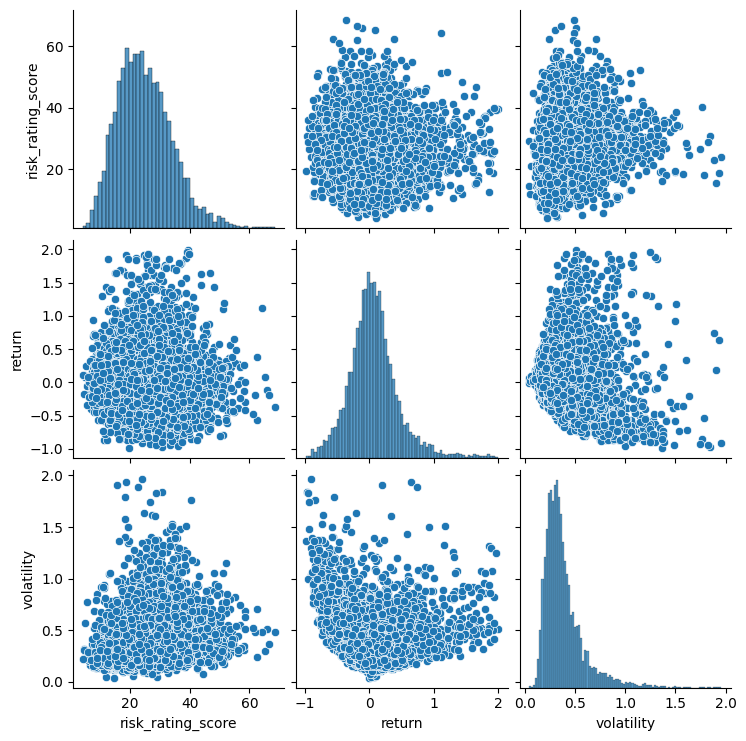

In [100]:
sns.pairplot(developed_df[["risk_rating_score","return","volatility"]])
plt.show()

In [101]:
developing_df = Filtered_df[(Filtered_df["developed"]==False)]

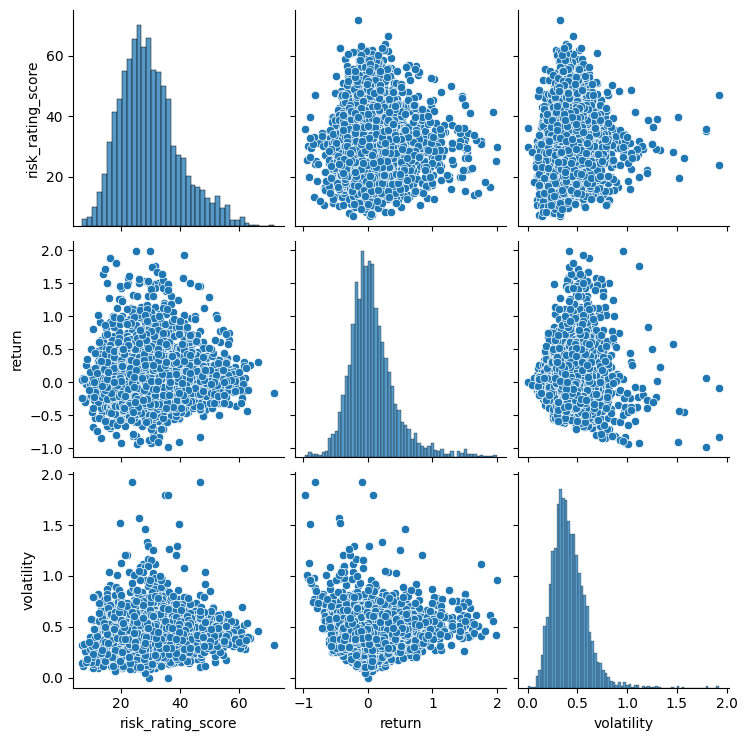

In [102]:

sns.pairplot((developing_df[["risk_rating_score","return","volatility"]]))
plt.show()

In [104]:
l_sector=list(Filtered_df["industry_group"].unique())
print(l_sector)

['Retailing', 'Telecommunication Services', 'Pharmaceuticals', 'Software & Services', 'Banks', 'Transportation', 'Diversified Metals', 'Textiles & Apparel', 'Commercial Services', 'Technology Hardware', 'Diversified Financials', 'Industrial Conglomerates', 'Semiconductors', 'Media', 'Chemicals', 'Real Estate', 'Healthcare', 'Machinery', 'Food Products', 'Utilities', 'Building Products', 'Aerospace & Defense', 'Auto Components', 'Electrical Equipment', 'Food Retailers', 'Consumer Durables', 'Household Products', 'Consumer Services', 'Steel', 'Construction & Engineering', 'Traders & Distributors', 'Energy Services', 'Insurance', 'Oil & Gas Producers', 'Transportation Infrastructure', 'Precious Metals', 'Automobiles', 'Refiners & Pipelines', 'Paper & Forestry', 'Containers & Packaging', 'Construction Materials', 'Homebuilders']


In [107]:
financial_real_estate = [
    'Banks', 'Diversified Financials', 'Insurance', 'Real Estate'
]
healthcare_pharma = [
    'Pharmaceuticals', 'Healthcare'
]
tech_communication = [
    'Software & Services', 'Technology Hardware', 'Semiconductors', 
    'Telecommunication Services', 'Media'
]
industrials_infrastructure = [
    'Transportation', 'Industrial Conglomerates', 'Machinery', 'Utilities',
    'Commercial Services', 'Transportation Infrastructure', 'Aerospace & Defense',
    'Electrical Equipment', 'Construction & Engineering', 'Building Products',
    'Energy Services', 'Homebuilders'
]
consumer_retail = [
    'Retailing', 'Textiles & Apparel', 'Food Retailers', 'Consumer Durables',
    'Household Products', 'Consumer Services', 'Food Products'
]
materials_energy = [
    'Diversified Metals', 'Steel', 'Chemicals', 'Oil & Gas Producers', 
    'Refiners & Pipelines', 'Precious Metals', 'Paper & Forestry',
    'Containers & Packaging', 'Construction Materials', 'Traders & Distributors',
    'Auto Components', 'Automobiles'
]




In [108]:
Filtered_df['sector'] = None
for index, row in Filtered_df.iterrows():
    if row["industry_group"] in financial_real_estate:
        Filtered_df.at[index, 'sector'] = 'financial_real_estate'
    elif row["industry_group"] in healthcare_pharma:
        Filtered_df.at[index, 'sector'] = 'healthcare_pharma'
    elif row["industry_group"] in tech_communication:
        Filtered_df.at[index, 'sector'] = 'tech_communication'
    elif row["industry_group"] in industrials_infrastructure:
        Filtered_df.at[index, 'sector'] = 'industrials_infrastructure'
    elif row["industry_group"] in consumer_retail:
        Filtered_df.at[index, 'sector'] = 'consumer_retail'
    elif row["industry_group"] in materials_energy:
        Filtered_df.at[index, 'sector'] = 'materials_energy'

C:\Users\Soumi\AppData\Local\Temp\ipykernel_7808\1025341911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Filtered_df['sector'] = None


In [109]:
Filtered_df.head()

risk_rating_score risk_rating_assessment              industry_group  \
0               28.9            Medium Risk                   Retailing   
1               27.7            Medium Risk  Telecommunication Services   
2               22.5            Medium Risk             Pharmaceuticals   
3               16.3               Low Risk         Software & Services   
4               35.0              High Risk                       Banks   

  identifier                   country           company_name  ticker  return  \
0   NAS:FLWS  United States of America  1-800-flowers-com-inc    FLWS -0.2236   
1    ETR:1U1                   Germany                 1-1-ag  1U1.DE -0.3420   
2    NAS:TXG  United States of America       10x-genomics-inc     TXG -0.7357   
3    WAR:11B                    Poland      11-bit-studios-sa  11B.WA -0.6866   
4   NAS:SRCE  United States of America        1st-source-corp    SRCE  0.1023   

   volatility  developed                 sector  
0      0.4191       True        consumer_retail  
1      0.2791       True     tech_communication  
2      0.6540       True      healthcare_pharma  
3      0.6431      False     tech_communication  
4      0.3087       True  financial_real_estate

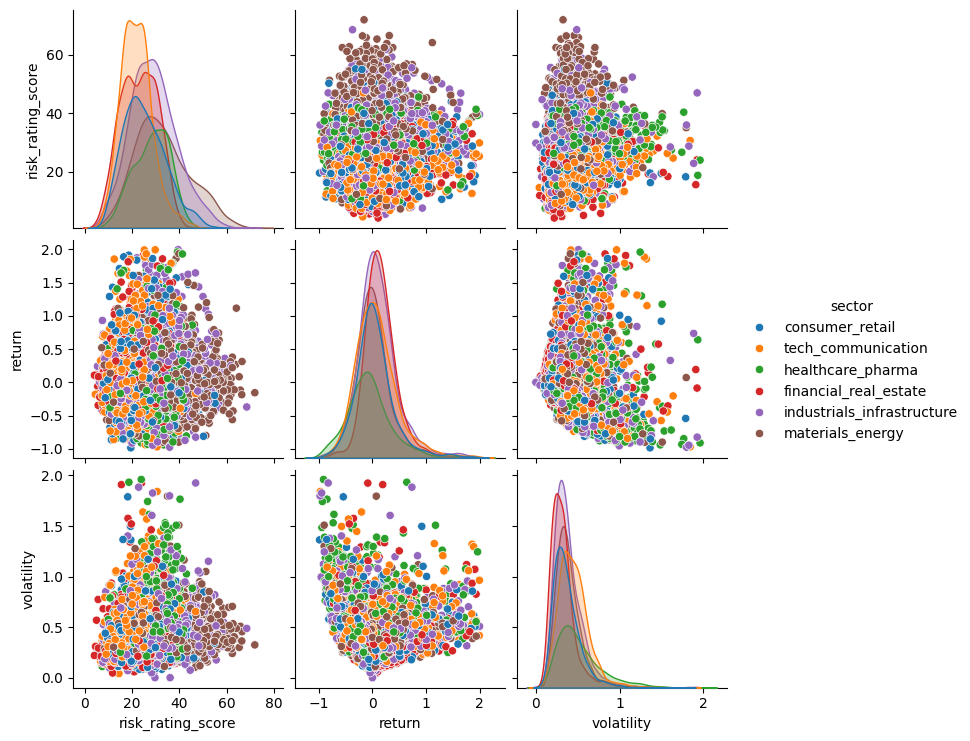

In [110]:

sns.pairplot(Filtered_df[["risk_rating_score","return","volatility", "sector"]], hue = 'sector')
plt.show()